In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import pycountry

from glob import glob

/home/rodolfo/anaconda3/envs/estudo/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Carregar dados

Dataset disponível em:
https://www.kaggle.com/datasets/unsdsn/world-happiness/data

In [2]:
files=glob('../dados/archive/*.csv')
files

['../dados/archive/2019.csv',
 '../dados/archive/2018.csv',
 '../dados/archive/2016.csv',
 '../dados/archive/2017.csv',
 '../dados/archive/2015.csv']

In [3]:
#Carregando os dados para um dicionário
reports={}
for path in files:
    ano=path.split('/')[-1].split('.')[0] #retorna o ano contido no caminho do arquivo
    reports[ano]=pd.read_csv(path)

# Descrição dos dados

O dataset contém reports sobre o nível de felicidade em 155 países entre os anos de 2015 e 2019. O nível de felicidade foi medido em uma pesquisa em que pessoas eram solicitadas a dar uma nota para suas pŕoprias vidas, na qual 10 seria o melhor cenário possível e 0 o pior. Os reports contam com o score de felicidade obtido por cada país, além de seis indicadores que podem ser usados para explicar o índice de felicidade. Os indicadores são os seguintes:

- GDP Per capita é o PIB per capita do pais;

- Social support é a média das repostas para a seguinte  pergunta: Em caso de dificuldades, você conta com familiares ou amigos que possam te ajudar? 

- Healthy life expectancy é a expectativa de vida;	

- Freedom to make life choices é a média das repostas para a seguinte pergunta: Você está safisfeito com a liberdade que possui para fazer escolhas na sua vida?;
 
- Generosity é o resíduo da regressão entre GDP per capita e a resposta média para a seguinte pergunta: Você doou dinheiro para caridade no mês passado?;

- Perceptions of corruption é a média das respostas para duas perguntas. A primeira delas é se a corrupção está disseminada no governo e a segunda se a corrupção está disseminada no mundo empresarial. Essa variável varia entre 0 e 1, onde 1 seria o país menor corrupto;

Para o cálculo da média das respostas foi atribuído valor 1 para respostas potivivas e valor 0 para respostas negativas.

Explicação detalhada pode ser encontrada em : https://worldhappiness.report/faq/

- Dystopia é um pai imaginário que teria o menor índice de felicidade. Esse país foi criado para servir com parâmetros de comparação com os demais, ou seja, como certo país está em comparação com o país na pior situação possível. Dystopia tem o pior resultado para cada um dos seis indicadores considerados;

- Residuals indicam a extensão com que os incicadores conseguem ou não explicar os indices de felicidade.

# Análise Preliminar

In [4]:
for ano in reports.keys():
    print(ano+f' : {reports[ano].shape}')
    print(reports[ano].columns)
    print('')

#O número de colunas e de linhas não é igual em todos os reports   

2019 : (156, 9)
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

2018 : (156, 9)
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

2016 : (157, 13)
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

2017 : (155, 12)
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Hea

- Nos reports de 2015,2016 e 2017 o indicador social support foi chamado de family;
- Reports de 2015, 2016 e 2017 contam com a coluna  'Dystopia Residual';
- Reports de 2016 e 2017 contam com o intervalo de confiança do indicado de felicidade;
- Nos reports de 2015 a 2017 a percepção de corrupção está relacionada somente ao setor governamental (Trust (Government Corruption)), enquanto nos de 2018 e 2019 está relacionada tanto ao setor governamental quanto ao setor empresarial.


In [5]:
#Alterando o nome das colunas para que tenham nomes iguais em reports diferentes

reports['2019'].rename(columns={'Country or region':'Country'},inplace=True)
reports['2018'].rename(columns={'Country or region':'Country'},inplace=True)
reports['2016'].rename(columns={'Happiness Rank':'Overall rank','Happiness Score':'Score','Economy (GDP per Capita)':'GDP per capita',
                                'Family':'Social support','Health (Life Expectancy)':'Healthy life expectancy','Freedom':'Freedom to make life choices'},inplace=True)
reports['2017'].rename(columns={ 'Happiness.Rank':'Overall rank','Happiness.Score':'Score','Economy..GDP.per.Capita.':'GDP per capita',
                                'Family':'Social support','Health..Life.Expectancy.':'Healthy life expectancy',
                                'Freedom':'Freedom to make life choices','Trust..Government.Corruption.':'Trust (Government Corruption)'},inplace=True)
reports['2015'].rename(columns={'Happiness Rank':'Overall rank','Happiness.Score':'Score','Economy (GDP per Capita)':'GDP per capita',
                                'Family':'Social support','Health (Life Expectancy)':'Healthy life expectancy',
                                'Freedom':'Freedom to make life choices','Trust (Government Corruption)':'Trust (Government Corruption)'},inplace=True)

In [6]:
#Adicionando uma coluna com o ano em cada um dos reports
for ano in reports.keys():
    reports[ano]['Year']=int(ano)

In [7]:
#Concatenando os dados dos reports anuais para facilitar a análise da evolução anual dos indicadores

reports_2015_a_2019=pd.concat([reports[ano] for ano in reports.keys()],axis=0)

In [8]:
reports_2015_a_2019

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year,Region,Lower Confidence Interval,Upper Confidence Interval,Trust (Government Corruption),Dystopia Residual,Whisker.high,Whisker.low,Dystopia.Residual,Happiness Score,Standard Error
0,1,Finland,7.769,1.34000,1.58700,0.98600,0.59600,0.15300,0.393,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Denmark,7.600,1.38300,1.57300,0.99600,0.59200,0.25200,0.410,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Norway,7.554,1.48800,1.58200,1.02800,0.60300,0.27100,0.341,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Iceland,7.494,1.38000,1.62400,1.02600,0.59100,0.35400,0.118,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Netherlands,7.488,1.39600,1.52200,0.99900,0.55700,0.32200,0.298,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,154,Rwanda,NaN,0.22208,0.77370,0.42864,0.59201,0.22628,NaN,2015,Sub-Saharan Africa,NaN,NaN,0.55191,0.67042,NaN,NaN,NaN,3.465,0.03464
154,155,Benin,NaN,0.28665,0.35386,0.31910,0.48450,0.18260,NaN,2015,Sub-Saharan Africa,NaN,NaN,0.08010,1.63328,NaN,NaN,NaN,3.340,0.03656
155,156,Syria,NaN,0.66320,0.47489,0.72193,0.15684,0.47179,NaN,2015,Middle East and Northern Africa,NaN,NaN,0.18906,0.32858,NaN,NaN,NaN,3.006,0.05015
156,157,Burundi,NaN,0.01530,0.41587,0.22396,0.11850,0.19727,NaN,2015,Sub-Saharan Africa,NaN,NaN,0.10062,1.83302,NaN,NaN,NaN,2.905,0.08658


In [9]:
#Selecionando as colunas de interesse
selected_columns=reports['2019'].columns.to_list()
selected_columns=selected_columns+['Trust (Government Corruption)']
reports_2015_a_2019=reports_2015_a_2019.loc[:,selected_columns]

In [10]:
reports_2015_a_2019

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year,Trust (Government Corruption)
0,1,Finland,7.769,1.34000,1.58700,0.98600,0.59600,0.15300,0.393,2019,NaN
1,2,Denmark,7.600,1.38300,1.57300,0.99600,0.59200,0.25200,0.410,2019,NaN
2,3,Norway,7.554,1.48800,1.58200,1.02800,0.60300,0.27100,0.341,2019,NaN
3,4,Iceland,7.494,1.38000,1.62400,1.02600,0.59100,0.35400,0.118,2019,NaN
4,5,Netherlands,7.488,1.39600,1.52200,0.99900,0.55700,0.32200,0.298,2019,NaN
...,...,...,...,...,...,...,...,...,...,...,...
153,154,Rwanda,NaN,0.22208,0.77370,0.42864,0.59201,0.22628,NaN,2015,0.55191
154,155,Benin,NaN,0.28665,0.35386,0.31910,0.48450,0.18260,NaN,2015,0.08010
155,156,Syria,NaN,0.66320,0.47489,0.72193,0.15684,0.47179,NaN,2015,0.18906
156,157,Burundi,NaN,0.01530,0.41587,0.22396,0.11850,0.19727,NaN,2015,0.10062


In [11]:
#Organizando para que os os indicadores anuais para cada pais apareçam na sequência
reports_2015_a_2019.sort_values(by=['Country','Year'],inplace=True)
reports_2015_a_2019

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year,Trust (Government Corruption)
152,153,Afghanistan,NaN,0.319820,0.302850,0.303350,0.234140,0.365100,NaN,2015,0.097190
153,154,Afghanistan,3.360,0.382270,0.110370,0.173440,0.164300,0.312680,NaN,2016,0.071120
140,141,Afghanistan,3.794,0.401477,0.581543,0.180747,0.106180,0.311871,NaN,2017,0.061158
144,145,Afghanistan,3.632,0.332000,0.537000,0.255000,0.085000,0.191000,0.036,2018,NaN
153,154,Afghanistan,3.203,0.350000,0.517000,0.361000,0.000000,0.158000,0.025,2019,NaN
...,...,...,...,...,...,...,...,...,...,...,...
114,115,Zimbabwe,NaN,0.271000,1.032760,0.334750,0.258610,0.189870,NaN,2015,0.080790
130,131,Zimbabwe,4.193,0.350410,0.714780,0.159500,0.254290,0.185030,NaN,2016,0.085820
137,138,Zimbabwe,3.875,0.375847,1.083096,0.196764,0.336384,0.189143,NaN,2017,0.095375
143,144,Zimbabwe,3.692,0.357000,1.094000,0.248000,0.406000,0.132000,0.099,2018,NaN


# Plotagem de Mapas

In [12]:
#Adicionando os códigos dos países nos reports para possibilitar a plotagem de mapas
#Os países serão identificados nos mapa pelos seus códigos

def gerar_codigo_pais(coluna):
    '''
    Função que gera o código do país a partir do seu nome. Esse códigos são necessários para a criação de mapas

    Inputs:
        Coluna de um pandas dataframe com nomes de países

    Outputs:
        Python list com os códigos dos países
    '''
    codigo=[]
    for nome_pais in coluna:
        try:
            codigo.append(pycountry.countries.get(name=nome_pais).alpha_3)
            #alpha_3 é para gerar um código de três letras
        except:
            codigo.append(None)
    return codigo
        

In [13]:
#Adicionando a coluna com o código do pais nos reports
for ano in reports.keys():
    reports[ano]['Country_Code']=gerar_codigo_pais(reports[ano]['Country'])


### Mapas com indicadores para ano selecionado

Geração dos mapas:

- Os mapas podem ser gerados para os reports anuais. Os anos disponíveis estão entre 2015 e 2019;
- Os mapas podem ser gerados para os seguintes indicadores:

    - Overall rank;
    - Healthy life expectancy	
    - Score;
    - Freedom to make life choices;
    - Generosity;
    - Perceptions of corruption;
    - GDP per capita;
    - Social support.


In [14]:
def gerar_mapa(data,ano,indicador,projecao='natural earth',animation_frame=None):
    '''
    Função para gerar o mapa mundi com cada país colorido de acordo com o valor do indicador selecionado

    ano       - (str) Ano do report entre 2015 e 2019. Refere-se ao ano dos indicadores.
    indicador - (str) Indicador que será mostrado no mapa. Indicadores aceitos:  overall rank, score, freedom to make life choices, generosity, perceptions of corruption , 
    GDP per capita, social support.
    '''
    if ano not in ['2015','2016','2017','2018','2019']:
        raise Exception('Report indisponivel. Os reports disponíveis são os dos anos 2015 a 2019')
    if indicador not in ['Overall rank','Score','Freedom to make life choices','Generosity','Perceptions of corruption','GDP per capita','Social support','Healthy life expectancy']:
        raise Exception('Indicador não conhecido')
    if indicador=='Perceptions of corruption' and ano not in ['2019','2018']:
        indicador='Trust (Government Corruption)'
    fig = px.choropleth(data[ano], locations='Country_Code', color=indicador, hover_name='Country',animation_frame=animation_frame,
                    projection=projecao, title=indicador+' '+ano)
    fig.show()


In [15]:
#indicadores:['Overall rank','Score','Freedom to make life choices','Generosity','Perceptions of corruption','GDP per capita','Social support']
gerar_mapa(reports,'2019','GDP per capita')  

#https://www.datacamp.com/tutorial/making-map-in-python-using-plotly-library-guide

### Mapas com evolução do indicador selecionado ao longo dos anos

In [16]:
#Adicão da coluna com os códigos dos países
reports_2015_a_2019['Country_Code']=gerar_codigo_pais(reports_2015_a_2019['Country'])
reports_2015_a_2019.head()

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year,Trust (Government Corruption),Country_Code
152,153,Afghanistan,NaN,0.319820,0.302850,0.303350,0.23414,0.365100,NaN,2015,0.097190,AFG
153,154,Afghanistan,3.360,0.382270,0.110370,0.173440,0.16430,0.312680,NaN,2016,0.071120,AFG
140,141,Afghanistan,3.794,0.401477,0.581543,0.180747,0.10618,0.311871,NaN,2017,0.061158,AFG
144,145,Afghanistan,3.632,0.332000,0.537000,0.255000,0.08500,0.191000,0.036,2018,NaN,AFG
153,154,Afghanistan,3.203,0.350000,0.517000,0.361000,0.00000,0.158000,0.025,2019,NaN,AFG


In [17]:
def mapa_animado(data,indicador,projecao='natural earth',animation_frame='Year'):
    '''
    Função para gerar o mapa mundi com cada país colorido de acordo com o valor do indicador selecionado
    No mapa será mostrado a evolução do indicador a longo dos anos, de 2015 a 2019

    indicador - (str) Indicador que será mostrado no mapa. Indicadores aceitos:  Overall rank, Score, Freedom to make life choices, Generosity, Perceptions of corruption,
    Trust (Government Corruption), GDP per capita, Social support.
    '''

    if indicador not in ['Overall rank','Score','Freedom to make life choices','Generosity','Perceptions of corruption','Trust (Government Corruption)','GDP per capita',
                         'Social support','Healthy life expectancy']:
        raise Exception('Indicador não conhecido')
    
    fig = px.choropleth(data, locations='Country_Code', color=indicador, hover_name='Country',animation_frame=animation_frame,
                    projection=projecao,title=indicador)
    fig.show()


In [18]:
mapa_animado(reports_2015_a_2019,'Perceptions of corruption')

# Evolução anual dos Indicadores

In [19]:
reports_2015_a_2019.columns

Index(['Overall rank', 'Country', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Year', 'Trust (Government Corruption)',
       'Country_Code'],
      dtype='object')

In [20]:
#Calcular desvio padrão dos indicadores
desvio_padrao_indicadores=reports_2015_a_2019.groupby('Country').std(numeric_only=True)
desvio_padrao_indicadores.drop(columns='Year',inplace=True)
desvio_padrao_indicadores

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Trust (Government Corruption)
Country,,,,,,,,,
Afghanistan,6.024948,0.265605,0.034180,0.198912,0.080217,0.087728,0.088569,0.007778,0.018606
Albania,6.618157,0.054510,0.044070,0.142736,0.060464,0.037015,0.023505,0.003536,0.012147
Algeria,21.004761,0.535610,0.060214,0.138801,0.073448,0.092699,0.008646,0.014849,0.013898
Angola,2.160247,0.040992,0.064094,0.219048,0.105597,0.051014,0.020917,NaN,0.008043
Argentina,9.148770,0.256293,0.055362,0.171728,0.077131,0.056039,0.026014,0.002828,0.012556
...,...,...,...,...,...,...,...,...,...
Venezuela,37.016213,0.627612,0.077735,0.181969,0.079676,0.122741,0.009033,0.003536,0.023248
Vietnam,8.871302,0.050953,0.057527,0.267161,0.080901,0.029501,0.044800,0.004243,0.014058
Yemen,6.348228,0.176611,0.127507,0.284191,0.065852,0.075736,0.010020,0.009192,0.011997


In [21]:
desvio_padrao_indicadores.sort_values(by='Overall rank',ascending=False)

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Trust (Government Corruption)
Country,,,,,,,,,
Venezuela,37.016213,0.627612,0.077735,0.181969,0.079676,0.122741,0.009033,0.003536,0.023248
Swaziland,24.041631,NaN,0.069961,0.053853,0.053500,0.004540,0.076785,NaN,NaN
Lesotho,22.261701,0.003464,0.062666,0.077483,0.068696,0.044976,0.028754,0.013435,0.004204
Ivory Coast,21.684096,0.465100,0.050977,0.128850,0.079915,0.049483,0.028682,0.009192,0.024582
Benin,21.440616,0.626277,0.054011,0.137216,0.081358,0.050355,0.018661,0.010607,0.009821
...,...,...,...,...,...,...,...,...,...
Oman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
def maiores_variacoes_indicadores(reports,indicador,num_paises):
    '''
    Função para gerar um dataframe com os países onde ocorreram as maiores variações do parâmetro selecionado
    As variações dos parâmetros são calculadas pelo desvio padrão do indicador ao longo dos anos

    inputs:
        reports  : (pandas Dataframe) as colunas do dataframe são indicadores e em cada linha estão os indicadores para um país em determinado ano
        indicador: (str) o indicador que se deseja analisar. As opções possíveis são: 'Overall rank', 'Score','GDP per capita','Social support','Healthy life expectancy',
            'Freedom to make life choices','Generosity	','Perceptions of corruption',Trust (Government Corruption)
        num_paises: (int) número de países que aparecerão no dataframe gerado. Por exemplo, caso num_paises igual a 10, será retornado um dataframe com os 
            10 paises onde ocorreram as maiores variações do indicador selecionado

    outputs: (pandas dataframe) dataframe com um total de num_paises os ocorreram as maiores variações do indicador selecionado.


    '''
    desvio_padrao_indicadores=reports.groupby('Country').std(numeric_only=True)
    desvio_padrao_indicadores.drop(columns='Year',inplace=True)
    
    df_indicador=desvio_padrao_indicadores.loc[:,[indicador]].sort_values(by=indicador,ascending=False)
    df_indicador.rename(columns={indicador:indicador+'_dp'},inplace=True)
    df_indicador.reset_index(inplace=True)
    df_indicador=df_indicador.iloc[:num_paises,:]
    print(len(df_indicador))
    resultado=pd.merge(df_indicador,reports,on='Country',how='inner')
    resultado=resultado.loc[:,['Country',indicador,"Year"]]
    resultado=resultado.pivot_table(columns="Country",index='Year')
    return resultado

## Score Felicidade

In [66]:
indicador='Score'
num_paises=5
variacao_score_felicidade=maiores_variacoes_indicadores(reports_2015_a_2019,indicador,num_paises)

5


In [67]:
variacao_score_felicidade

Score                                    
Country Algeria  Benin Guinea Ivory Coast Venezuela
Year                                               
2016      6.355  3.484  3.607       3.916     6.084
2017      5.872  3.657  3.507       4.180     5.250
2018      5.295  4.141  3.964       4.671     4.806
2019      5.211  4.883  4.534       4.944     4.707

In [70]:
variacao_score_felicidade['Score']

Country,Algeria,Benin,Guinea,Ivory Coast,Venezuela
Year,,,,,
2016,6.355,3.484,3.607,3.916,6.084
2017,5.872,3.657,3.507,4.180,5.250
2018,5.295,4.141,3.964,4.671,4.806
2019,5.211,4.883,4.534,4.944,4.707


([<matplotlib.axis.XTick at 0x7efc30b58430>,
 [Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019')])

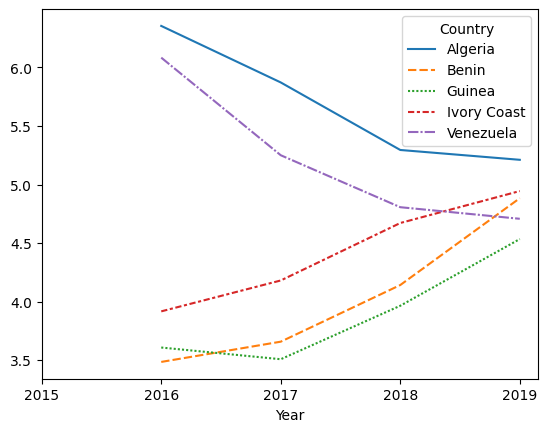

In [77]:
sns.lineplot(data=variacao_score_felicidade['Score'])
plt.xticks(reports_2015_a_2019['Year'].unique())

In [73]:
variacao_score_felicidade['Score'].index

Int64Index([2016, 2017, 2018, 2019], dtype='int64', name='Year')

In [76]:
reports_2015_a_2019['Year'].unique()

array([2015, 2016, 2017, 2018, 2019])